In [60]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [61]:
# Loading data
df = Path("Student performance (Polytechnic Institute of Portalegre).csv")

In [62]:
performance_df = pd.read_csv(df)
performance_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [63]:
# Define the mapping
mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
# Apply the mapping to the 'Target' column
performance_df['Target'] = performance_df['Target'].map(mapping)
# Convert the 'Target' column to an array
target_array = performance_df['Target'].values
print(target_array)

[0 2 0 ... 0 2 2]


In [64]:
# Define features set
X = performance_df.copy()
X.drop("Target", axis=1, inplace=True)
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [65]:
# Define target vector
y= performance_df["Target"].ravel()
y[:5]

array([0, 2, 0, 2, 2])

In [66]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [67]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [68]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [69]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [70]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

In [71]:
print(y_train)

[0 2 2 ... 2 2 0]


In [72]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [73]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [74]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Dropout", "Actual Enrolled","Actual Graduate"], 
    columns=["Predicted Dropout", "Predicted Enrolled","Predicted Graduate"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [75]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted Dropout,Predicted Enrolled,Predicted Graduate
Actual Dropout,292,29,53
Actual Enrolled,56,66,75
Actual Graduate,13,22,500


Accuracy Score : 0.7757685352622061
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       374
           1       0.56      0.34      0.42       197
           2       0.80      0.93      0.86       535

    accuracy                           0.78      1106
   macro avg       0.72      0.68      0.69      1106
weighted avg       0.76      0.78      0.76      1106



In [76]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.14595100059913824, 'Curricular units 2nd sem (approved)'),
 (0.10183072462187012, 'Curricular units 2nd sem (grade)'),
 (0.0947812323455211, 'Curricular units 1st sem (approved)'),
 (0.06571310694194318, 'Curricular units 1st sem (grade)'),
 (0.04285179373711017, 'Tuition fees up to date'),
 (0.04215689546038175, 'Curricular units 2nd sem (evaluations)'),
 (0.04210676510394336, 'Admission grade'),
 (0.03704644586073989, 'Previous qualification (grade)'),
 (0.0364298364433, 'Curricular units 1st sem (evaluations)'),
 (0.035945499274052224, 'Age at enrollment'),
 (0.03326040061954022, 'Course'),
 (0.0292452834718437, "Father's occupation"),
 (0.02552155598631324, "Mother's occupation"),
 (0.023788286411597716, 'GDP'),
 (0.022023308851780908, 'Unemployment rate'),
 (0.02117785059107485, "Father's qualification"),
 (0.021144692073774334, 'Curricular units 2nd sem (enrolled)'),
 (0.02093292402607809, 'Application mode'),
 (0.020882238666758483, 'Inflation rate'),
 (0.020426201798232572,

/var/folders/0h/lqy3k6gn3dnf1vwn1ct91kc80000gn/T/ipykernel_4392/1025506446.py:8: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('Features_Importances.PNG')
/Users/kaylajehnzen/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


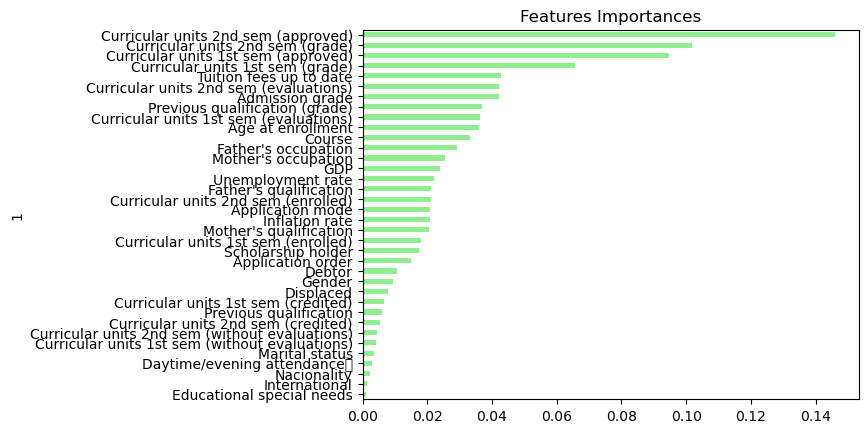

In [77]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
plt.savefig('Features_Importances.PNG')